<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/Boston_Houses_Kaggle_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boston houses prices prediction using machine learning

In [2]:
#libraries import

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Columns description:

CRIM per capita crime rate by town¶ ZN proportion of residential land zoned for lots over 25,000 sq.ft. INDUS proportion of non-retail business acres per town CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) NOX nitric oxides concentration (parts per 10 million) RM average number of rooms per dwelling AGE proportion of owner-occupied units built prior to 1940 DIS weighted distances to five Boston employment centres RAD index of accessibility to radial highways TAX full-value property-tax rate per 10,000 dolars PTRATIO pupil-teacher ratio by town B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town LSTAT % lower status of the population MEDV Median value of owner-occupied homes in 1000 dolar

In [4]:
raw_data = load_boston()
boston_df = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
# Adicionando uma coluna com as classes (Y)
boston_df["MEDV"] = raw_data["target"]
boston_df.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [5]:
#checking empty colums
missing_atts = []
for (colName, colData) in boston_df.iteritems():
    if (np.any(colData=='?')):
        missing_atts.append(colName)
        print(colName)

In [5]:
boston_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
#basis statistics
boston_df.describe()

CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

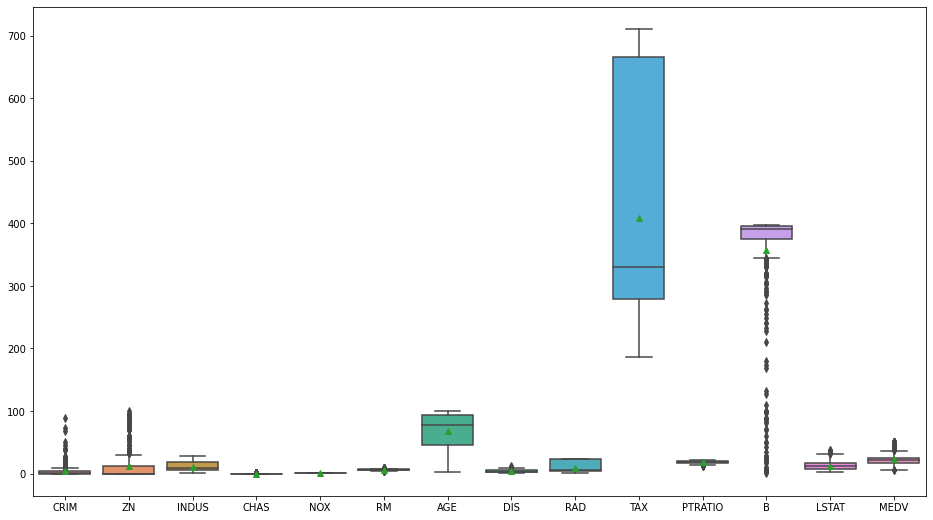

In [7]:
#Boxplot
plt.figure(figsize=(16,9))
sns.boxplot(data=boston_df, showmeans=True)

#very hard to see lower values due to the diffrence in magnitude
#B proportion of blacks with lots of outliers

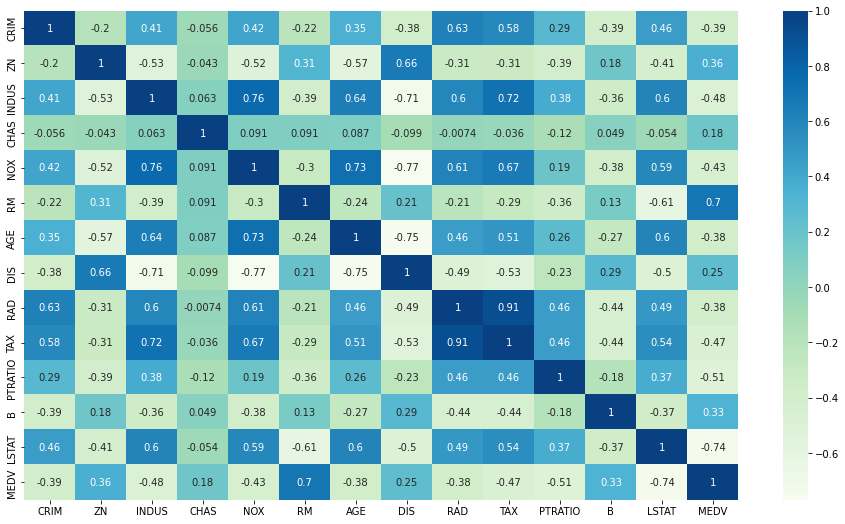

In [8]:
#pearson correlation

plt.figure(figsize=(16,9))
sns.heatmap(boston_df.corr(),
            annot=True,
            cmap="GnBu")

In [8]:
#spliting y and x, training and test

y = raw_data["target"]
X = raw_data["data"]

#Alternative way to do
#y = boston_df[boston_df.columns[13:]]
#X = boston_df[boston_df.columns[:13]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 20)
print(f"X :{X.shape}")
print(f"y :{y.shape}")

print("%.0f%% used for test" % (len(X_test)*100/(len(X_train)+len(X_test))))

X :(506, 13)
y :(506,)
25% used for test


In [9]:
#multiple correlation

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
coeficientes_lineares = LR.coef_
termo_independete = LR.intercept_ 

#prediction
y_pred = LR.predict(X_test)

#R²:
accuracy_linear_regression = LR.score(X_train,y_train)

print("R² da equação: %.2f%%" % (accuracy_linear_regression*100))

R² da equação: 74.19%


RMSE:  5.878795473604473
R2:  57.124221124674435


[Text(0.6719182466526779, 0.9722222222222222, 'RM <= 6.838\nsquared_error = 85.539\nsamples = 379\nvalue = 22.732'),
 Text(0.4056570368705036, 0.9166666666666666, 'LSTAT <= 14.4\nsquared_error = 39.843\nsamples = 313\nvalue = 19.795'),
 Text(0.18934664768185452, 0.8611111111111112, 'DIS <= 1.385\nsquared_error = 25.63\nsamples = 180\nvalue = 23.45'),
 Text(0.11542515987210232, 0.8055555555555556, 'B <= 339.985\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.112867206235012, 0.75, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.11798311350919265, 0.75, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.2632681354916067, 0.8055555555555556, 'RM <= 6.543\nsquared_error = 13.857\nsamples = 176\nvalue = 22.972'),
 Text(0.1230990207833733, 0.75, 'LSTAT <= 7.76\nsquared_error = 6.958\nsamples = 142\nvalue = 21.786'),
 Text(0.053557154276578735, 0.6944444444444444, 'DIS <= 6.126\nsquared_error = 3.329\nsamples = 34\nvalue = 24.218'),
 Text(0.02941646682653877

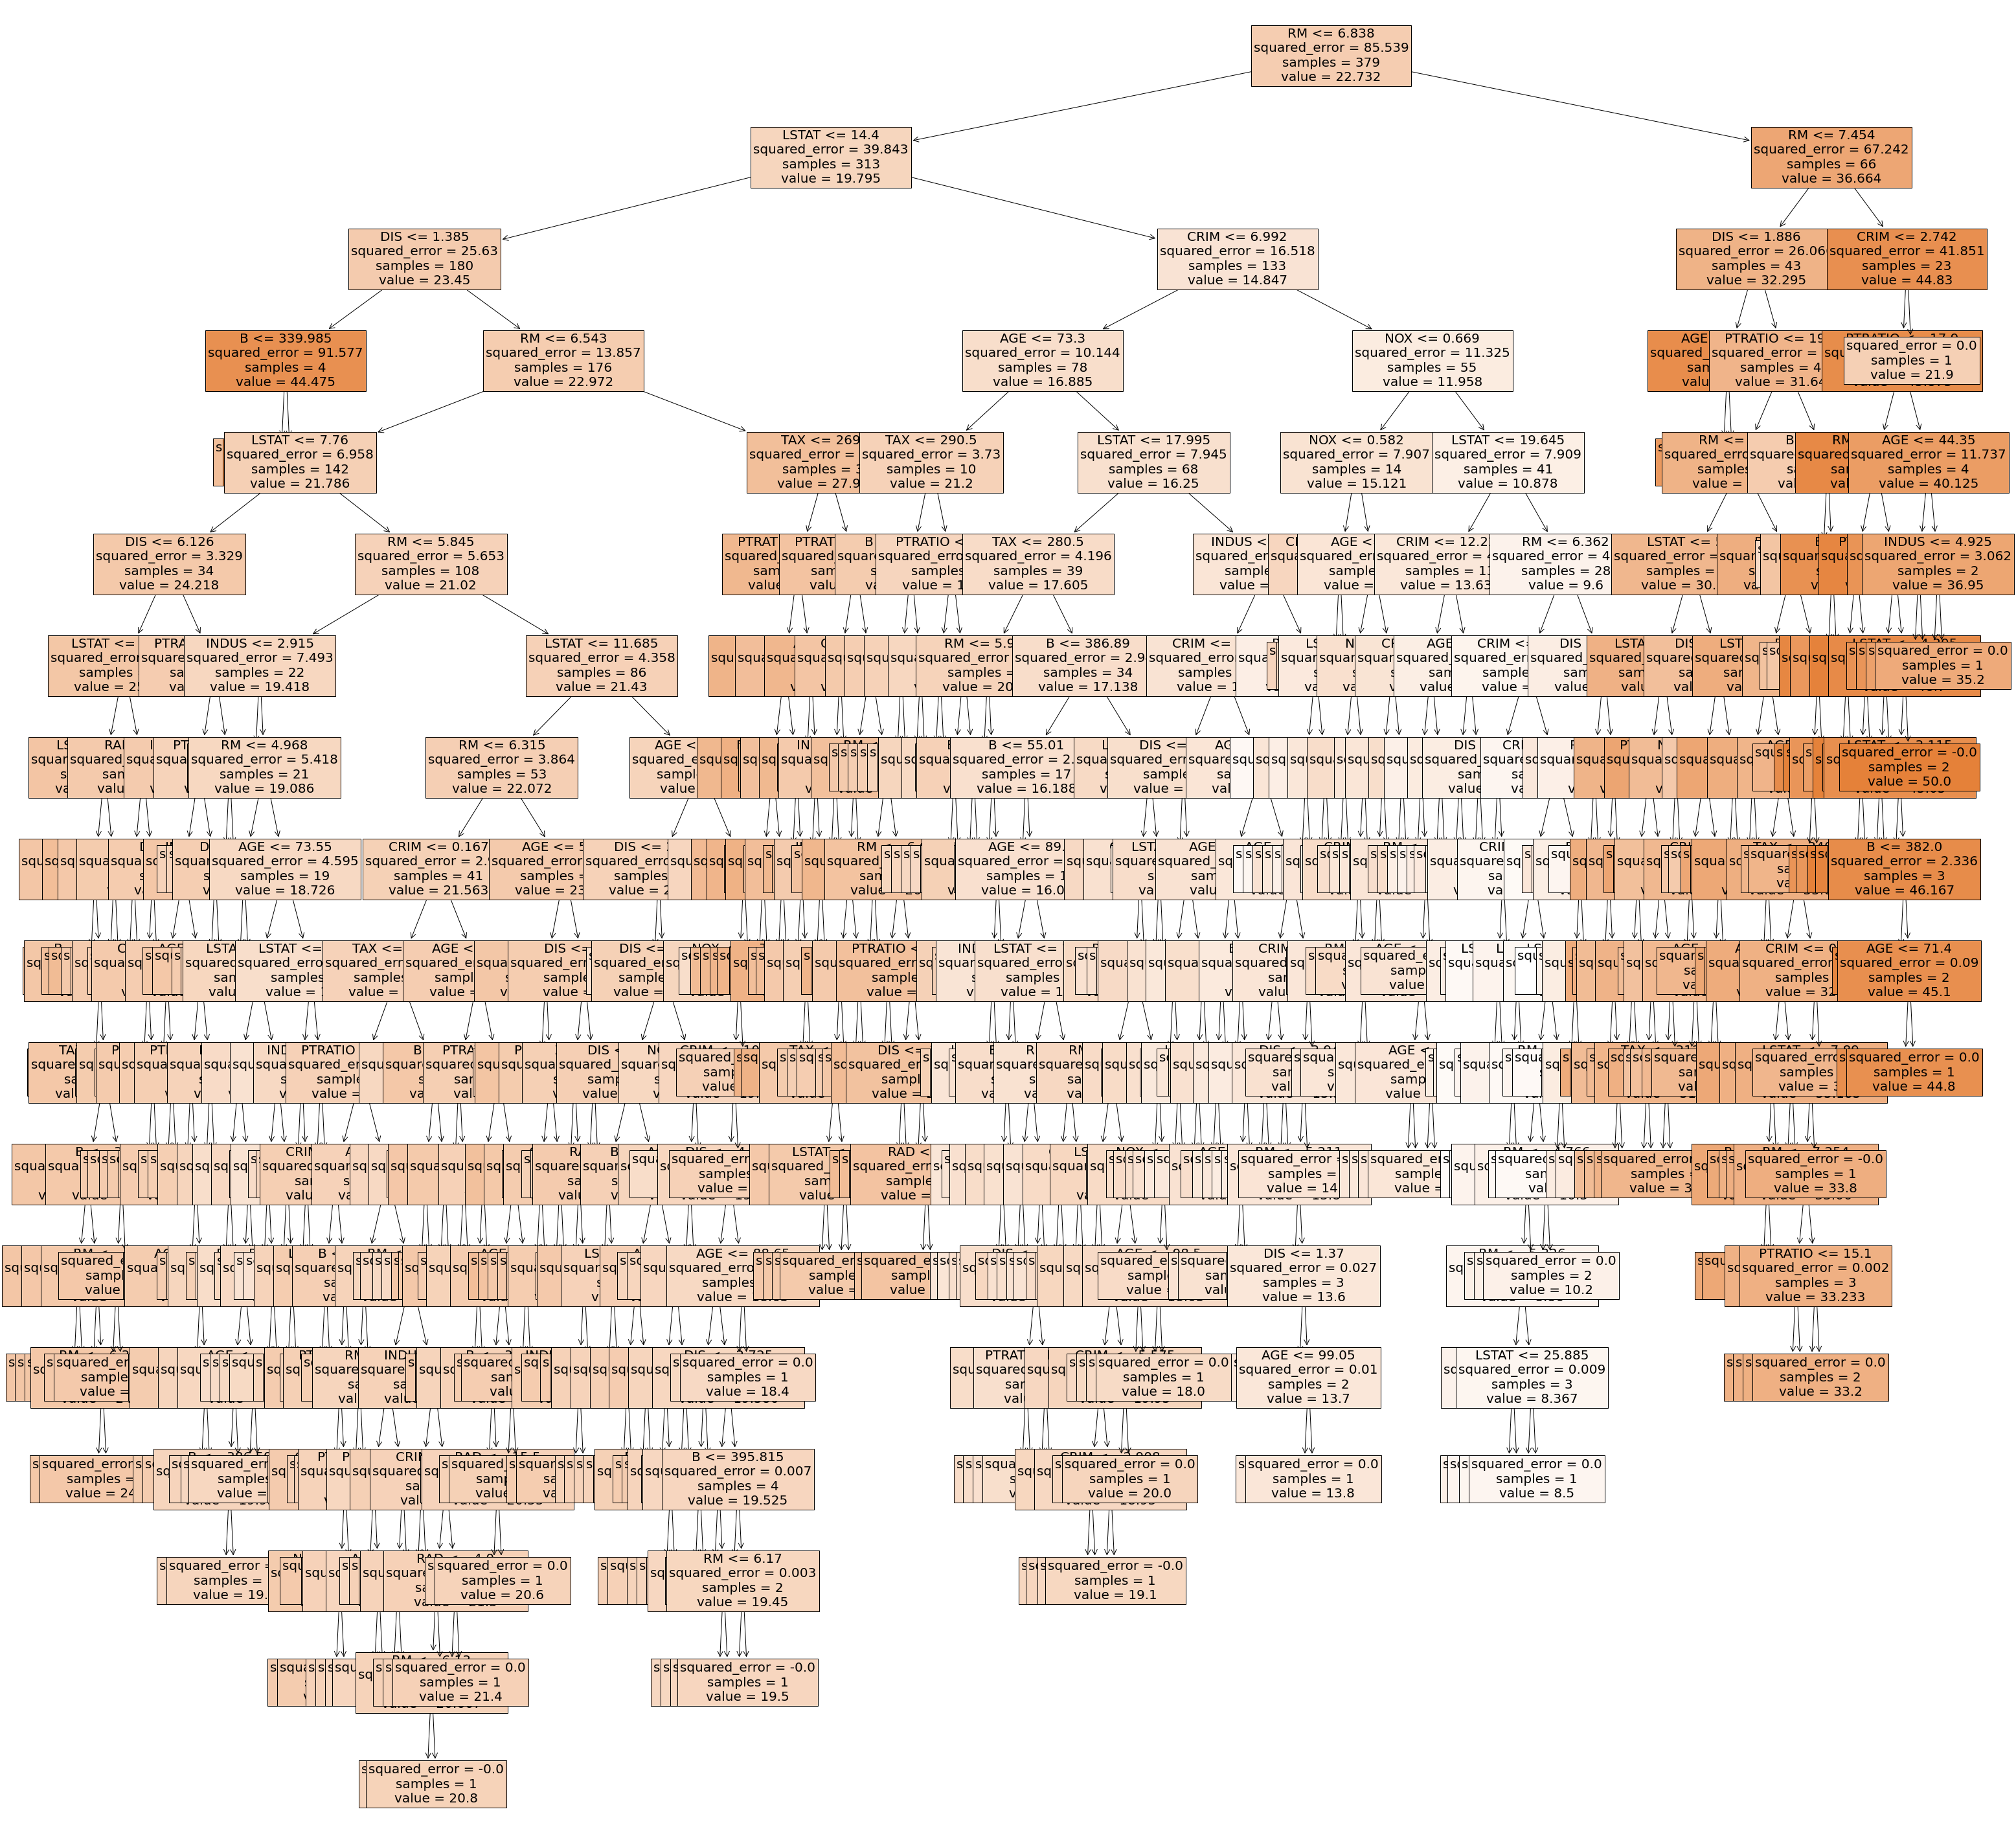

In [10]:
#decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

boston_dt = DecisionTreeRegressor()
boston_dt.fit(X_train,y_train)

#model prediction
y_pred = boston_dt.predict(X_test)

#evaluating
resultados = {}

name = "Decision tree"
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2*100)

#plotting the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
ftr = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.figure(figsize=(52,52))
plot_tree(boston_dt, filled=True, fontsize = 20, feature_names = ftr)

In [11]:
#one of the pre processing techniques is Principal Component , which reduces the dimensionality of the dataset
#appling PCA for dimensionality reduction and then check if the decision tree regressor get better R²

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Separando as colunas X e a coluna Y pois a padronização é aplicada apenas em X
y = boston_df[boston_df.columns[13:]]
X = boston_df[boston_df.columns[:13]]

#Padronizando as colunas de X - Média = 1 e desvpad = 0
x_standard = StandardScaler().fit_transform(X)
len(X)

506

In [14]:
pca = PCA(n_components=8)
principal_components = pca.fit_transform(x_standard)
principal_df = pd.DataFrame(data = principal_components)

print("The %d principal components explain %.2f%% of original data variance" % (len(pca.components_),
                                                                                         pca.explained_variance_ratio_.sum() * 100))
component_names = ['component {}'.format(i) for i in range(len(pca.components_))]

The 8 principal components explain 92.95% of original data variance


In [15]:
final_df = pd.concat([principal_df, boston_df[['MEDV']]], axis = 1)
final_df

0         1         2         3  ...         5         6         7  MEDV
0   -2.098297  0.773113  0.342943 -0.891774  ... -0.315338  0.318641  0.295832  24.0
1   -1.457252  0.591985 -0.695199 -0.487459  ...  0.264223  0.553861 -0.223670  21.6
2   -2.074598  0.599639  0.167122 -0.739204  ...  0.448095  0.484560  0.105166  34.7
3   -2.611504 -0.006871 -0.100284 -0.343721  ...  0.664649  0.622641  0.255941  33.4
4   -2.458185  0.097712 -0.075348 -0.427907  ...  0.617047  0.705086 -0.134524  36.2
..        ...       ...       ...       ...  ...       ...       ...       ...   ...
501 -0.314968  0.724285 -0.860896 -0.434740  ...  0.508064  0.199056 -0.249896  22.4
502 -0.110513  0.759308 -1.255979 -0.309376  ...  0.408208  0.191779 -0.146502  20.6
503 -0.312360  1.155246 -0.408598 -0.786304  ...  0.467947  0.294119 -0.638660  23.9
504 -0.270519  1.041362 -0.585454 -0.678134  ...  0.482259  0.271597 -0.579344  22.0
505 -0.125803  0.761978 -1.294882 -0.288329  ...  0.401474  0.175310 -0.133382  11.9

[506 rows x 9 columns]

In [16]:
PCA_df = np.concatenate((principal_components,y),axis=1)

In [17]:
#splitting in x and y, test and train data after PCA

y = final_df[final_df.columns[8:]]
X = final_df[final_df.columns[:8]]

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X, y, test_size=0.25, random_state = 20)

print(f"X :{X.shape}")
print(f"y :{y.shape}")

print("%.0f%% do conjunto de dados será utilizado para teste" % (len(X_test_PCA)*100/(len(X_train_PCA)+len(X_test_PCA))))

X :(506, 8)
y :(506, 1)
25% do conjunto de dados será utilizado para teste


In [18]:
#decision tree after PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

final_dt = DecisionTreeRegressor()
final_dt.fit(X_train_PCA,y_train_PCA)

# Fazendo a Predição do Modelo:
y_pred = final_dt.predict(X_test_PCA)

RMSE:  5.0368484709870955
R2:  0.6852591657543425


[Text(0.583433039029623, 0.9736842105263158, 'X[0] <= -0.16\nsquared_error = 85.539\nsamples = 379\nvalue = 22.732'),
 Text(0.30632684214869216, 0.9210526315789473, 'X[2] <= 0.521\nsquared_error = 67.659\nsamples = 204\nvalue = 27.448'),
 Text(0.13678933905437743, 0.868421052631579, 'X[2] <= -0.799\nsquared_error = 15.984\nsamples = 134\nvalue = 23.183'),
 Text(0.04604340292103309, 0.8157894736842105, 'X[5] <= 0.167\nsquared_error = 6.544\nsamples = 43\nvalue = 20.228'),
 Text(0.016503011799653435, 0.7631578947368421, 'X[7] <= -1.119\nsquared_error = 3.161\nsamples = 12\nvalue = 17.867'),
 Text(0.0052809637758891, 0.7105263157894737, 'X[2] <= -1.881\nsquared_error = 0.802\nsamples = 3\nvalue = 15.633'),
 Text(0.00264048188794455, 0.6578947368421053, 'squared_error = 0.0\nsamples = 1\nvalue = 14.4'),
 Text(0.00792144566383365, 0.6578947368421053, 'X[5] <= -0.252\nsquared_error = 0.062\nsamples = 2\nvalue = 16.25'),
 Text(0.0052809637758891, 0.6052631578947368, 'squared_error = 0.0\nsamp

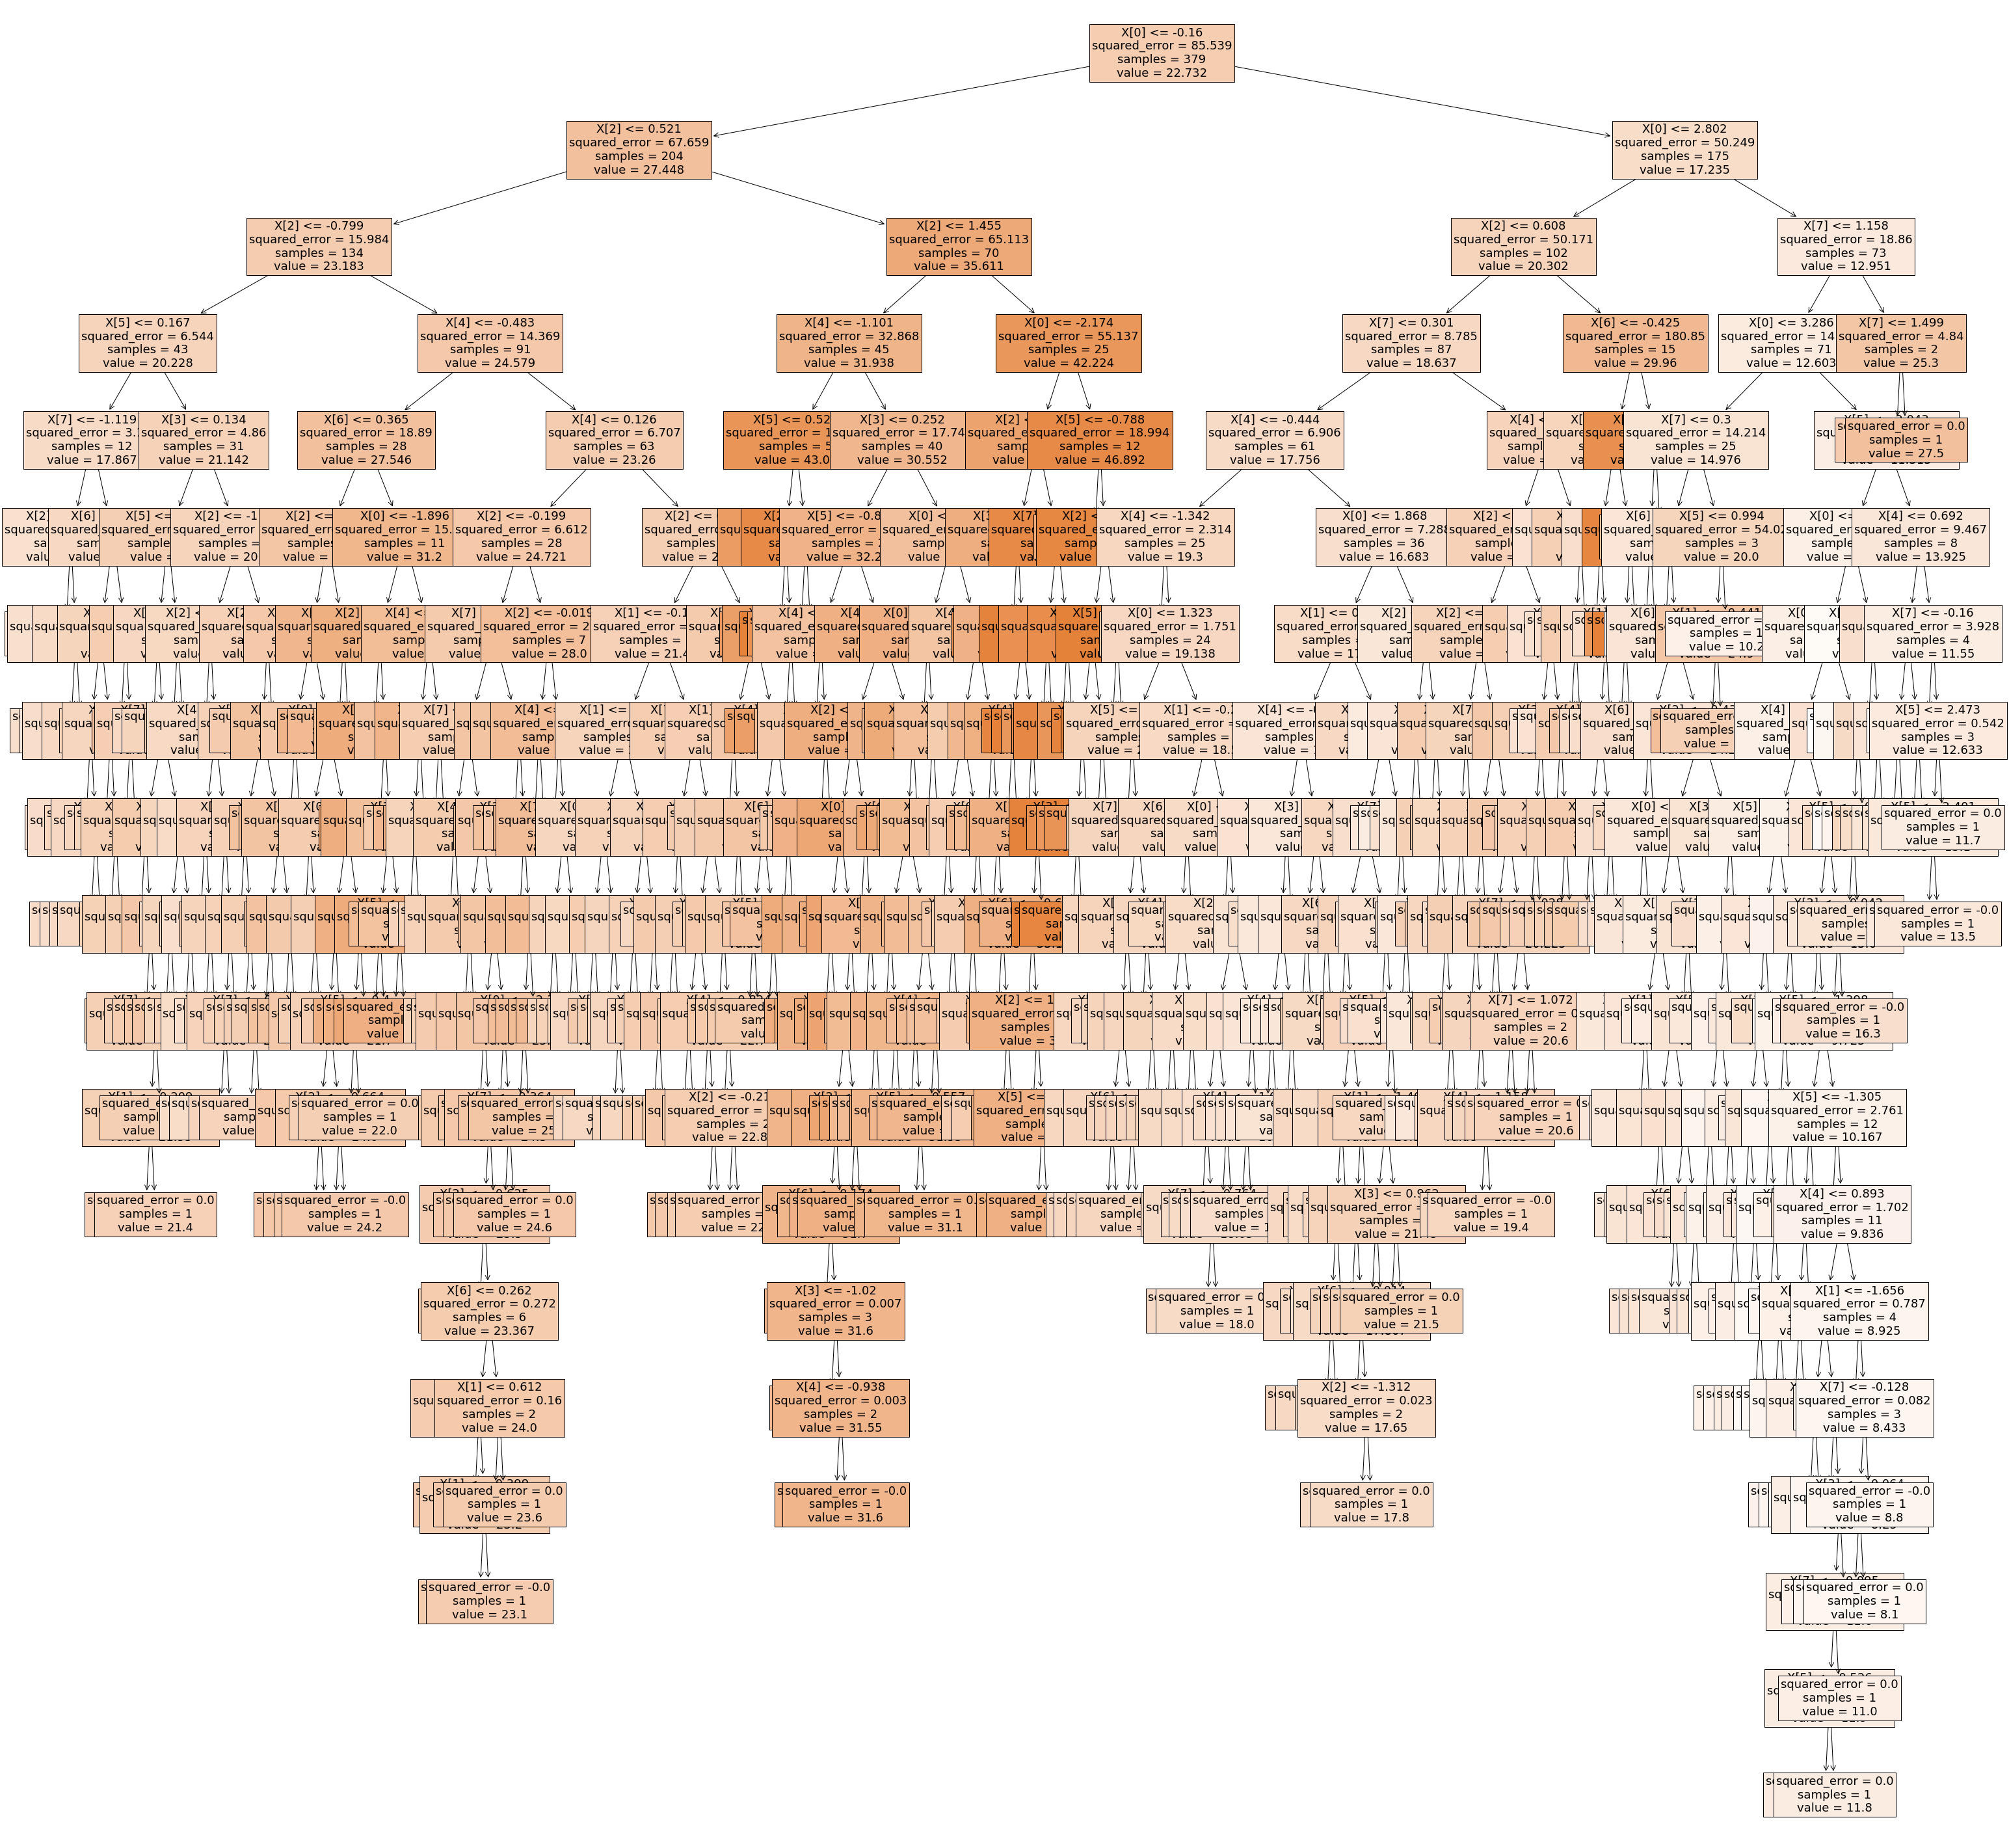

In [19]:
#prediction:
y_pred = final_dt.predict(X_test_PCA)

#evaluating:
resultados = {}

name = "Decision tree"
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2)

resultados[name] = {}
resultados[name]["rmse"] = rmse
resultados[name]["r2"] = r2

plt.figure(figsize=(52,52))
plot_tree(final_dt, filled=True, fontsize = 18)

Comparing the methods

Multiple Regression: 
R² = 74.19%

Random Forest:
RMSE:  5.87
R²:  57.12%

Random Forest after PCA:
RMSE:  5.03
R²:  68.52%

